# Bank Marketing Campaign Subscriptions
![BCS](https://rakbank.ae/wps/wcm/connect/e8420a51-7d9c-4317-b5e1-fc43c30c1dbe/04-01-21-Promo-Rewards-web-banner.jpg?MOD=AJPERES&CACHEID=ROOTWORKSPACE-e8420a51-7d9c-4317-b5e1-fc43c30c1dbe-nrcFdBh)

# Introduction
**This is the extendede work of [Georgios Spyrou](https://github.com/gpsyrou/Binary_Classification_of_Bank_Marketing_Campaigns)**, In this project it is to analyze a dataset containing information about marketing campaigns that were conducted via phone calls from a Portuguese banking institution to their clients. Purpose of these campaigns is to prompt their clients to subscribe for a specific financial product of the bank (term deposit). After each call was conducted, the client had to inform the institution about their intention of either subscribing to the product (indicating a successful campaign) or not (unsucessful campaign).

# Dataset Description
The dataset has 41188 rows (instances of calls to clients) and 21 columns (variables) which are describing certain aspects of the call. Please note that there are cases where the same client was contacted multiple times - something that practically doesn't affect the analysis as each call will be considered independent from another even if the client is the same.

Dataset description link: https://www.kaggle.com/pankajbhowmik/bank-marketing-campaign-subscriptions

# Import libraries, datas3t and perform EDA

In [1]:
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style("dark")
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
bank_servey = pd.read_csv("../input/bank-marketing-campaign-subscriptions/Bank_Campaign.csv", sep=';', header=[0])

In [3]:
bank_servey.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [4]:
bank_servey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#Data Cleaning
# remove the duplicates values from dataframe
bank_servey = bank_servey.drop_duplicates()
bank_servey.shape

(41176, 21)

In [6]:
# There are many missing values in other forms like 'unknown'
missing_cols = bank_servey.isin(['unknown']).sum(axis=0)
missing_cols

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribed           0
dtype: int64

In [7]:
#variables that are representing quantities/numbers
bank_servey.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


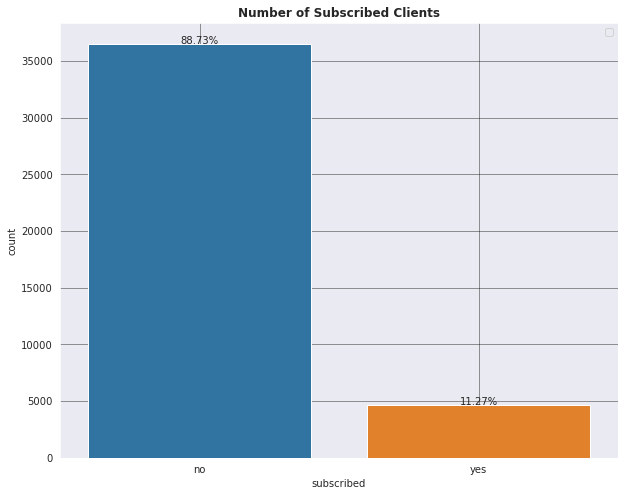

In [8]:
fig = plt.figure(figsize=(10,8)) 
plt.title('Number of Subscribed Clients', fontweight='bold')
ax=sns.countplot(x='subscribed', data=bank_servey)
size = float(bank_servey.shape[0])
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(True, alpha=0.5, color='black')
plt.legend(loc='best')
plt.show()

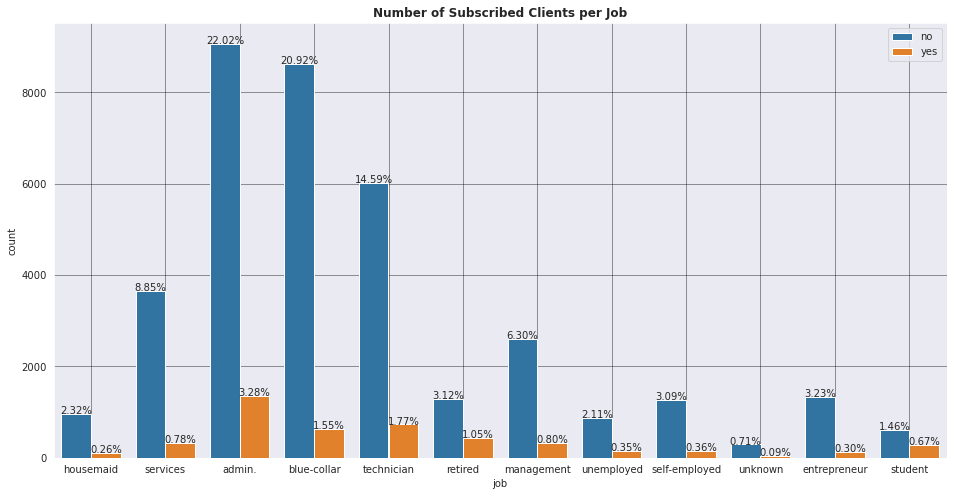

In [9]:
fig = plt.figure(figsize=(16,8)) 
plt.title('Number of Subscribed Clients per Job', fontweight='bold')
ax=sns.countplot(data=bank_servey, x='job', hue='subscribed')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(True, alpha=0.5, color='black')
plt.legend(loc='best')
plt.show()

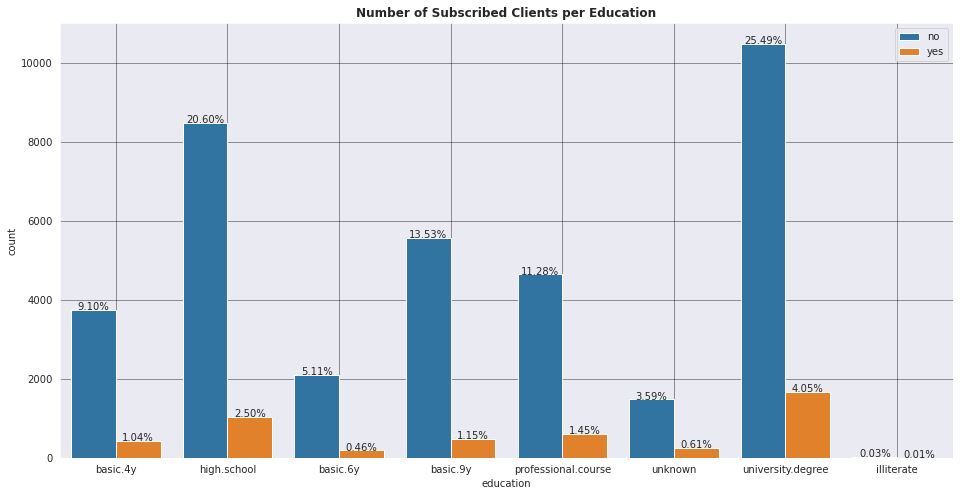

In [10]:
fig = plt.figure(figsize=(16,8)) 
plt.title('Number of Subscribed Clients per Education', fontweight='bold')
ax=sns.countplot(data=bank_servey, x='education', hue='subscribed')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(True, alpha=0.5, color='black')
plt.legend(loc='best')
plt.show()

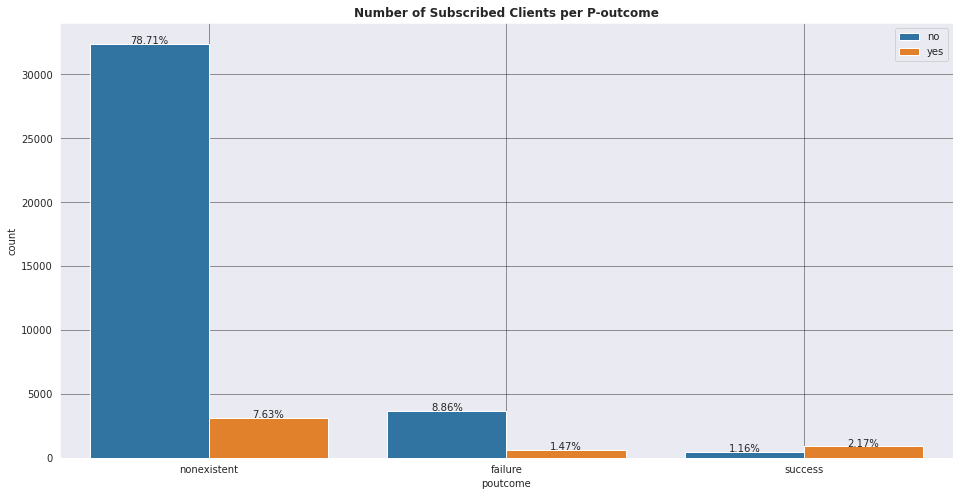

In [11]:
fig = plt.figure(figsize=(16,8)) 
plt.title('Number of Subscribed Clients per P-outcome', fontweight='bold')
ax=sns.countplot(data=bank_servey, x='poutcome', hue='subscribed')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(True, alpha=0.5, color='black')
plt.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Relationship between continuous variables')

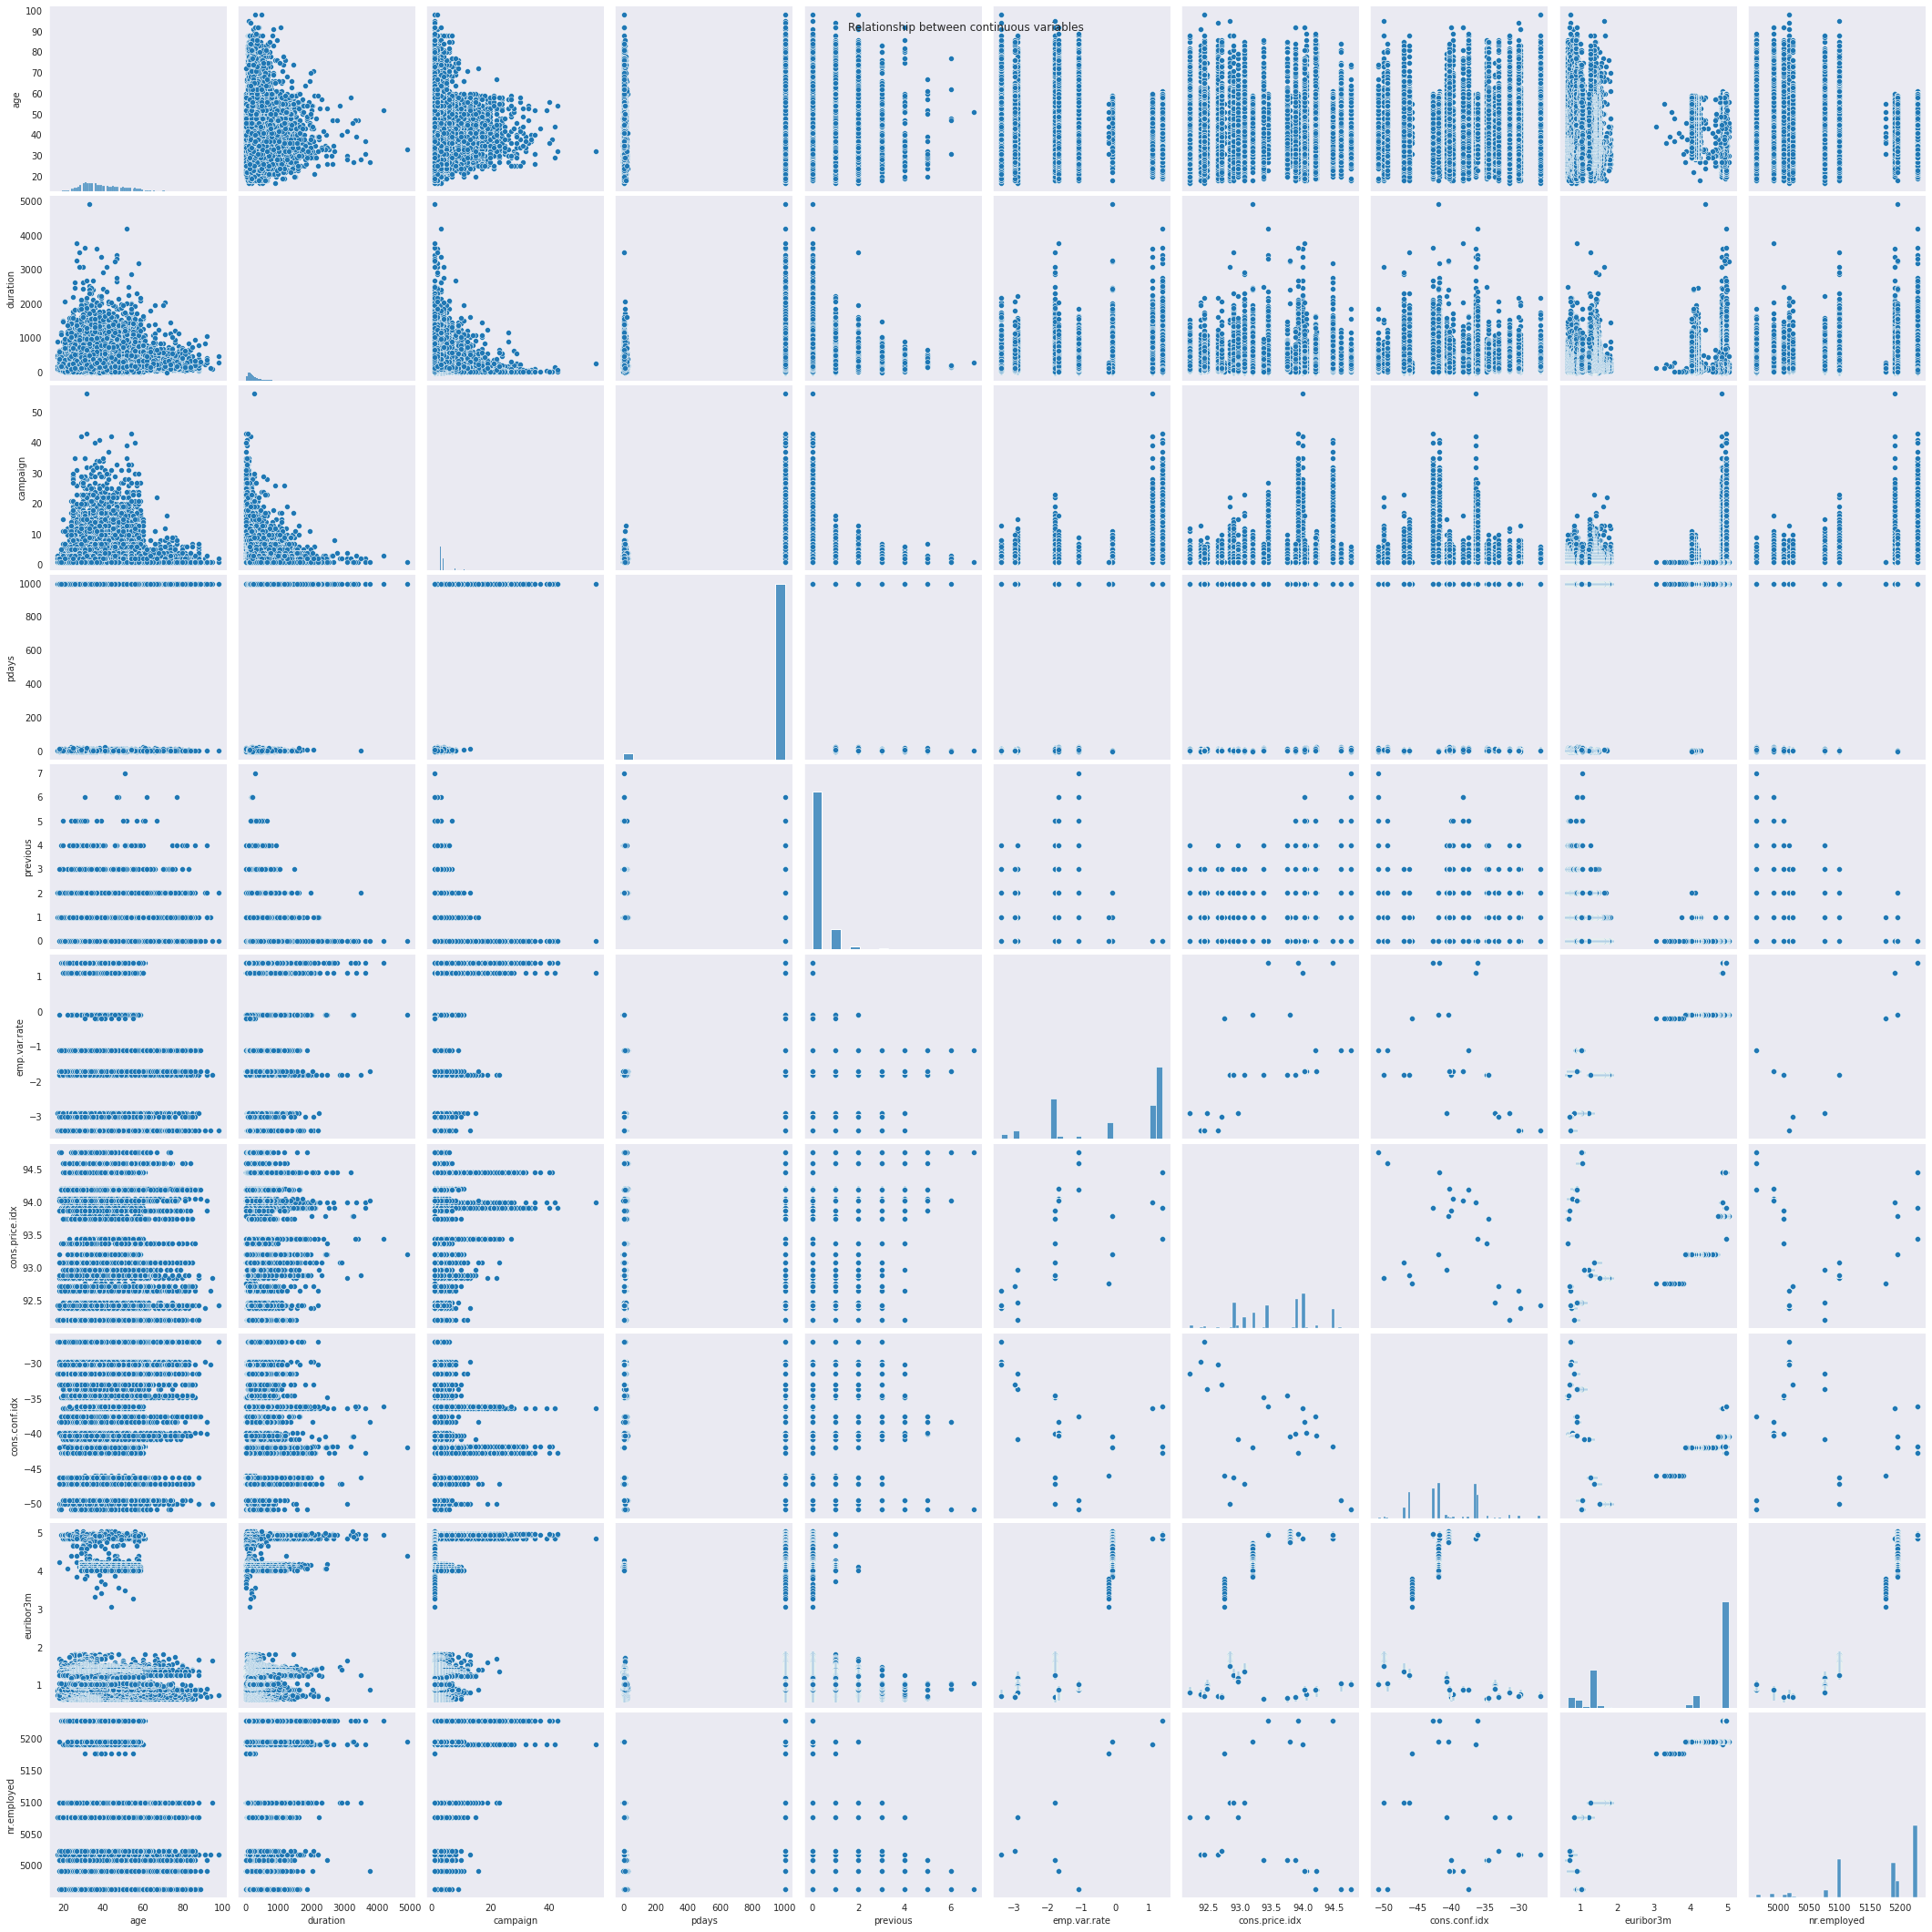

In [12]:
bank_servey.columns
sns.pairplot(bank_servey, size=3)
plt.suptitle('Relationship between continuous variables')

Text(0.5, 0.98, 'Visualizing Multidimensional Relationships')

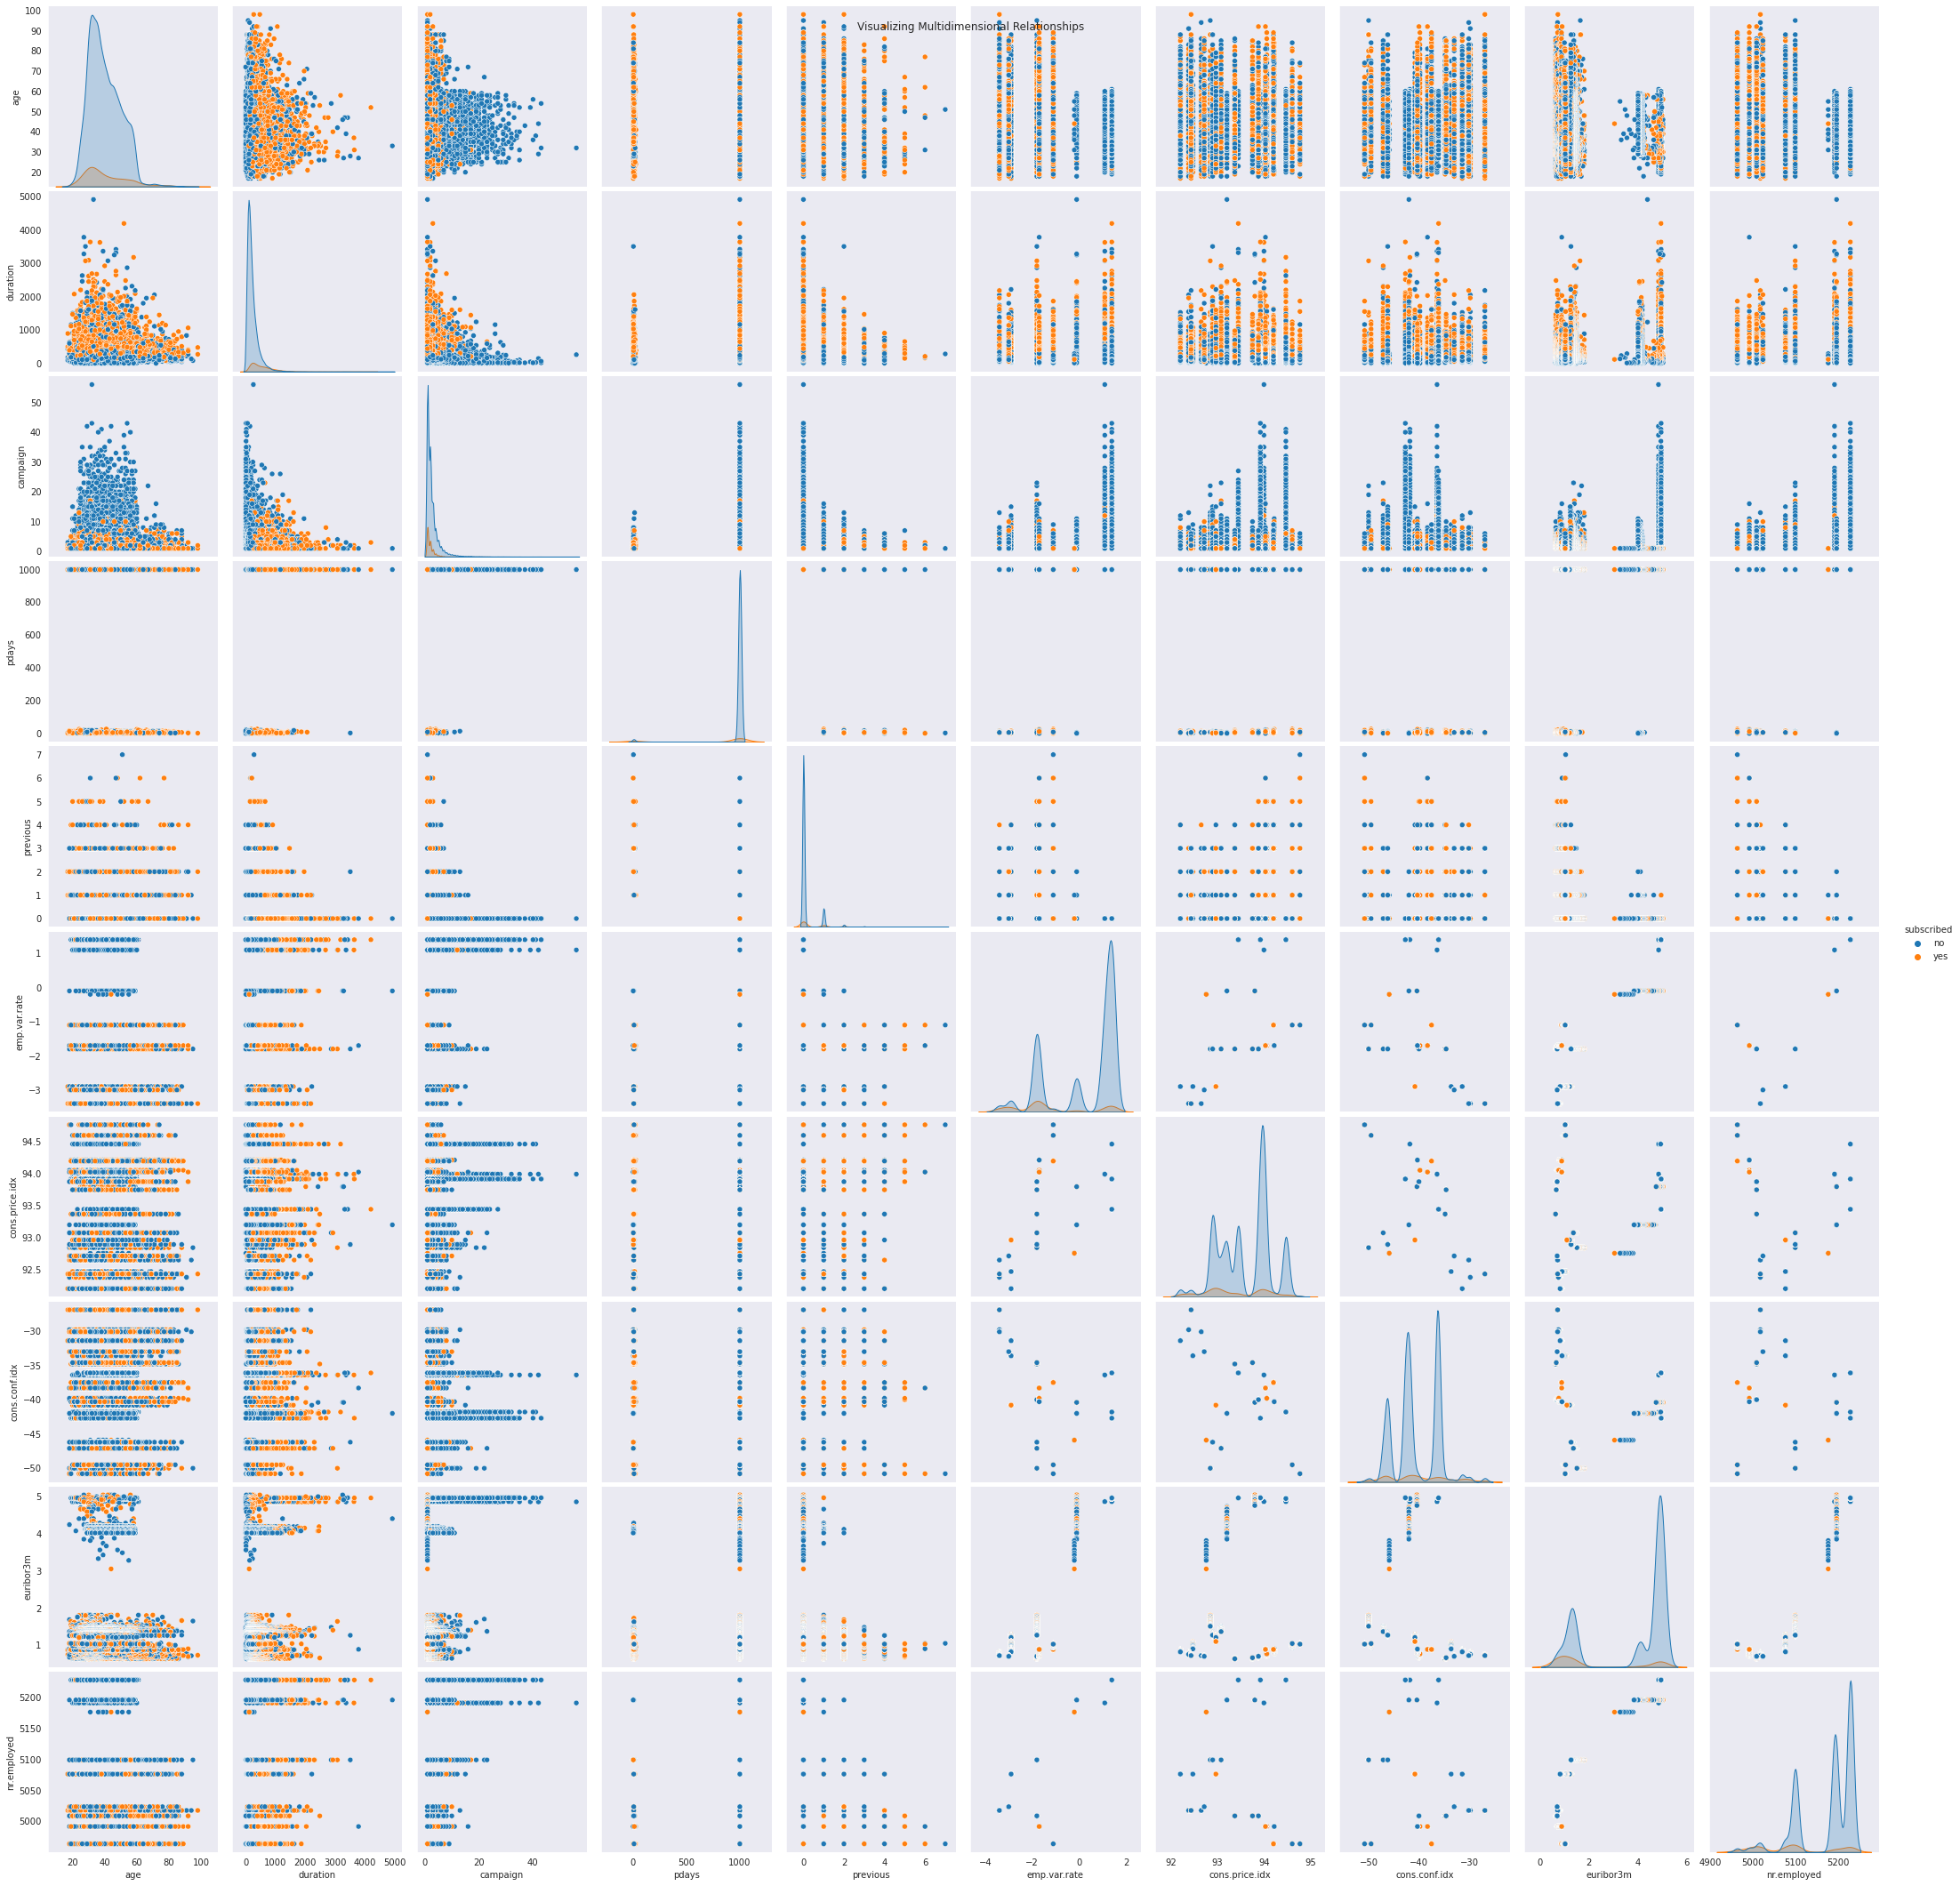

In [13]:
sns.pairplot(bank_servey, hue='subscribed', size=3);
plt.suptitle('Visualizing Multidimensional Relationships')

Text(0.5, 0.98, 'Correlation Matrix')

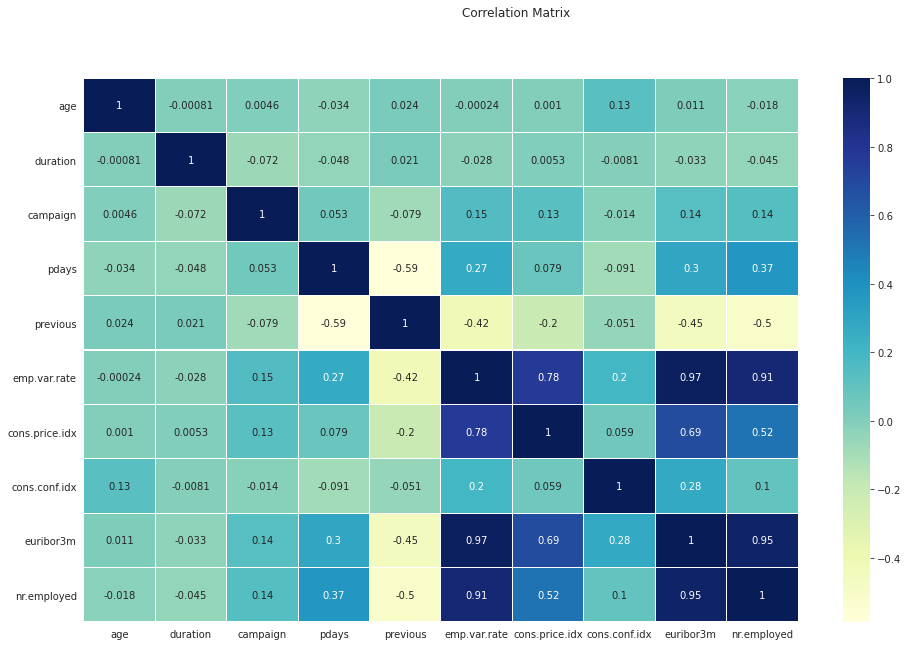

In [14]:
#create the correlation matrix heat map
plt.figure(figsize=(16,10))
sns.heatmap(bank_servey.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.suptitle('Correlation Matrix')

# Data Preprocessing

In [15]:
# map the values from the target variable from 'yes' and 'no' to 1 and 0, as follows:
bank_servey.drop(columns=['pdays'], inplace=True)
# Transform the 'yes' and 'no' values (target variable) to 1 and 0 respectively
bank_servey['subscribed'] = bank_servey['subscribed'].map({'yes': 1, 'no': 0})

In [16]:
#the pre-processing part is to encode the categorical features of the dataset.
#we will use the one-hot encoding method
categorical_cols = bank_servey.select_dtypes(include=['object']).columns
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [17]:
encoded_df = pd.concat([bank_servey, pd.get_dummies(bank_servey[categorical_cols])], axis=1)

In [18]:
encoded_df = encoded_df.drop(categorical_cols, axis=1)
encoded_df.head(10)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
5,45,198,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
6,59,139,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
7,41,217,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
8,24,380,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
9,25,50,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


Following the encoding of the categorical features, we will continue with the normalization (scalling) of the numerical features. For this  we will use the MinMax scalling method.

In [19]:
# Scale
scaler = MinMaxScaler(feature_range=(0, 1))
encoded_scaled_df = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)

In [20]:
# Split the data to train and test sets
X = encoded_scaled_df.loc[:, encoded_scaled_df.columns != 'subscribed']
y = encoded_scaled_df['subscribed']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Evaluation Metrics

In [22]:
#For model evaluation, let's define a function
def getModelEvaluationMetrics(classifier, model_name: str, x_test: pd.core.frame.DataFrame,
                              y_test: pd.core.frame.DataFrame, y_predicted, plot_confusion_matrix=False,
                              figsize=(10, 8)) -> np.ndarray:

    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    print('Confusion matrix:\n\n {0}'.format(conf_mat))

    if plot_confusion_matrix:
        labels = ['no', 'yes']
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
        cax = ax.matshow(conf_mat, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('Expected')
        plt.title(f'Confusion Matrix for {model_name}', fontweight='bold')
        plt.show()

    # Calculating the precision (tp/tp+fp)
    precision = str(np.round((conf_mat[1][1] / (conf_mat[1][1] +
                              conf_mat[0][1])) * 100, 2))
    print('The precision is: {0} %'.format(precision))

    # Calculating the recall (tp/tp+fn)
    recall = str(np.round((conf_mat[1][1] / (conf_mat[1][1] +
                           conf_mat[1][0])) * 100, 2))
    print('The recall is: {0} %'.format(recall))

    return conf_mat

In [23]:
#To perform a full ROC analysis let's define a function
#ROC Curve and calculating of the ROC AUC score
def createROCAnalysis(classifier, model_name: str, y_test: pd.core.series.Series, pred_probs: np.ndarray,
                      plot_ROC_Curve=False, figsize=(10, 8)) -> int:
   
    if plot_ROC_Curve:
        plt.figure(figsize=figsize)
        plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier')
        fp_rate, tp_rate, _ = roc_curve(y_test, pred_probs[:, 1])
        plt.plot(fp_rate, tp_rate, marker='.', label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}', fontweight='bold')
        plt.grid(True, alpha=0.1, color='black')
        plt.legend(loc='lower right')
        plt.show()

    # Calculate Area Under Curve (AUC) for the Receiver Operating
    # Characteristics Curve (ROC)
    auc_score = np.round(roc_auc_score(y_test, pred_probs[:, 1]), 4)
    print(f'{model_name} - ROC AUC score: {auc_score}')

    return auc_score

# Apply Classification Models

Let's first see the outcome found by **Georgios Spyrou in his project**

In [24]:
# Instantiate the Random Forest model
#Pre-tuned Hyperparameter
rf_class = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Confusion matrix:

 [[7119  146]
 [ 593  378]]


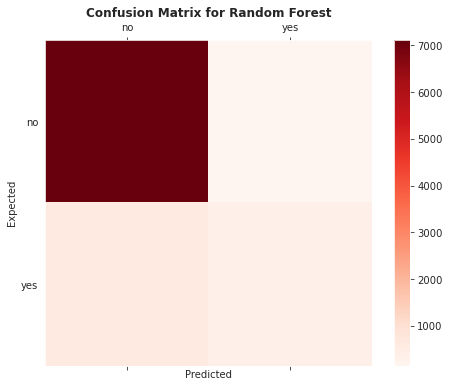

The precision is: 72.14 %
The recall is: 38.93 %


array([[7119,  146],
       [ 593,  378]])

In [25]:
# Assign the above probabilities to the corresponding class ('no', 'yes')
rf_class.fit(X_train, y_train)
rf_y_pred = rf_class.predict(X_test)
# Evaluate the model by using Recall/Precission:
getModelEvaluationMetrics(classifier=rf_class, model_name='Random Forest',x_test=X_test, y_test=y_test,
                              y_predicted=rf_y_pred, plot_confusion_matrix=True, figsize=(8,6))

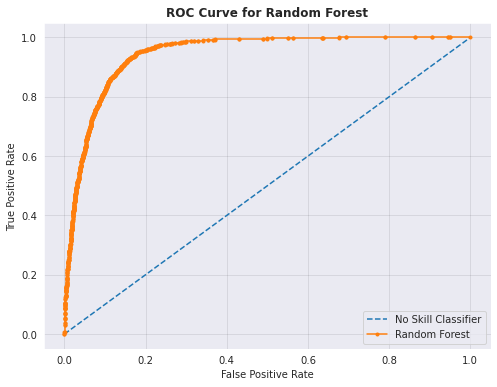

Random Forest - ROC AUC score: 0.944


0.944

In [26]:
# Evaluate the model by using ROC Curve:
rf_pred_probs = rf_class.predict_proba(X_test)
createROCAnalysis(classifier=rf_class, model_name='Random Forest', y_test=y_test, pred_probs=rf_pred_probs,
                  plot_ROC_Curve=True, figsize=(8,6))

Well, the model shows very good at predicting clients who are not going to subscribe (negative class)
**But did not perform very well in the case of the positive class**, as it classified correctly approximately 39% of the total clients who end up subscribing for the product. 

# My Approach to XGboost

Now, here i will try apply xgboost classifire tin this circumstance. Let see whether my model can perform better in the case of the positive class or not?? 

[07:03:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix:

 [[6993  272]
 [ 455  516]]


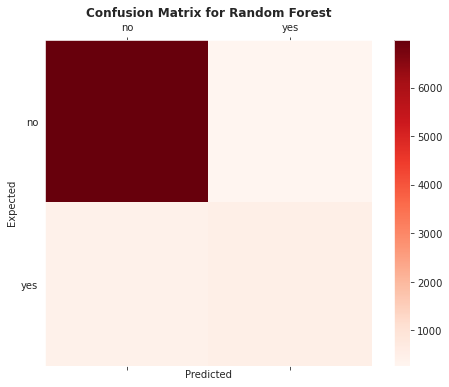

The precision is: 65.48 %
The recall is: 53.14 %


array([[6993,  272],
       [ 455,  516]])

In [27]:
import xgboost as xgb
xb = xgb.XGBClassifier(learning_rate = 0.01, max_depth = 10, min_child_weight = 2, subsample = 0.5, colsample_bytree = 0.7, n_estimators = 1000)
xb.fit(X_train, y_train)
xb_y_pred = xb.predict(X_test)
# Evaluate the model by using Recall/Precission:
getModelEvaluationMetrics(classifier=xb, model_name='Random Forest',x_test=X_test, y_test=y_test,
                              y_predicted=xb_y_pred, plot_confusion_matrix=True, figsize=(8,6))

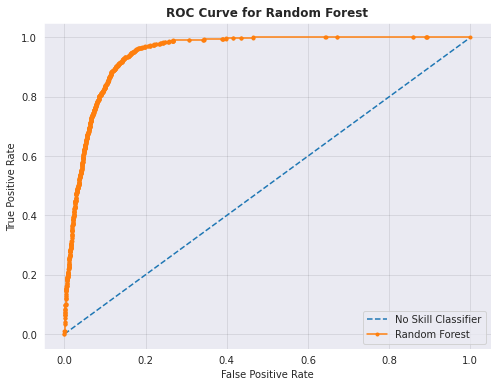

Random Forest - ROC AUC score: 0.947


0.947

In [28]:
xb_predict_probs = xb.predict_proba(X_test)
createROCAnalysis(classifier=xb, model_name='Random Forest', y_test=y_test, pred_probs=xb_predict_probs,
                  plot_ROC_Curve=True, figsize=(8,6))

Okay, my xgboost model perform very well compared to the random forest model in the case of the positive class, the xgboost classified correctly approximately 53% of the total clients who end up subscribing for the product. 

**Previous model [Random Forest Classifire]** = subscription(yes)- **39%**

**Proposed model [XGboost Classifire]** = subscription(yes)- **53%**

# Apply PCA

In [29]:
# Find the feature importance based on Gini criterion
feature_importance = {}
best_estimator_fi = rf_class.feature_importances_

for feature, importance in zip(X_train.columns, best_estimator_fi):
    feature_importance[feature] = importance

importances = pd.DataFrame.from_dict(feature_importance, orient='index').rename(columns={0: 'Gini Score'})

importances = importances.sort_values(by='Gini Score', ascending=False)

**The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.**

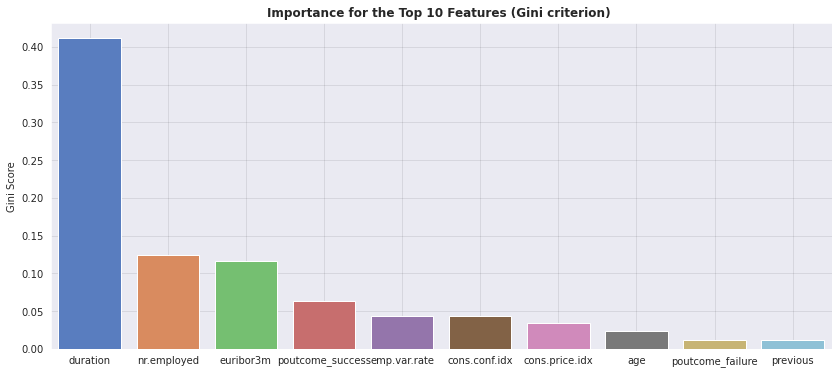

In [30]:
# Plot for feature importance
plt.figure(figsize=(14, 6))
sns.barplot(x=importances.index[0:10],
            y=importances['Gini Score'].iloc[0:10], palette='muted')
plt.title(f'Importance for the Top 10 Features (Gini criterion) ',
          fontweight='bold')
plt.grid(True, alpha=0.1, color='black')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.09332304, 0.04725506, 0.04061724, 0.03724039, 0.03553758,
       0.03083206, 0.02911126, 0.02879673, 0.02733921, 0.0268158 ])

Let's apply xgboost to pridict suscription using only 10 important fearures!

[07:19:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix:

 [[7127  138]
 [ 790  181]]


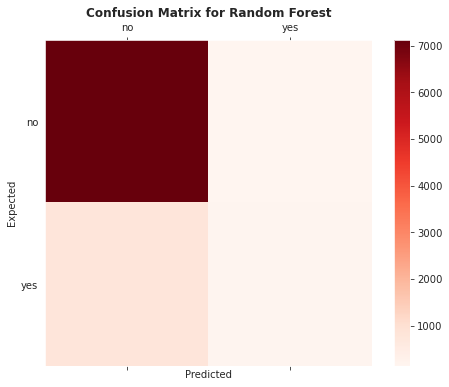

The precision is: 56.74 %
The recall is: 18.64 %


array([[7127,  138],
       [ 790,  181]])

In [32]:
xb = xgb.XGBClassifier(learning_rate = 0.01, max_depth = 10, min_child_weight = 2, subsample = 0.5, colsample_bytree = 0.7, n_estimators = 1000)
xb.fit(X_train, y_train)
xb_y_pred = xb.predict(X_test)
# Evaluate the model by using Recall/Precission:
getModelEvaluationMetrics(classifier=xb, model_name='Random Forest',x_test=X_test, y_test=y_test,
                              y_predicted=xb_y_pred, plot_confusion_matrix=True, figsize=(8,6))

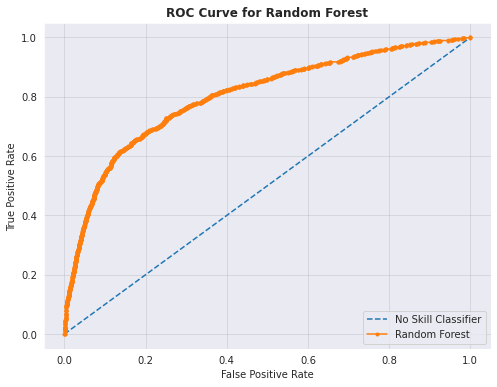

Random Forest - ROC AUC score: 0.8029


0.8029

In [33]:
xb_predict_probs = xb.predict_proba(X_test)
createROCAnalysis(classifier=xb, model_name='Random Forest', y_test=y_test, pred_probs=xb_predict_probs,
                  plot_ROC_Curve=True, figsize=(8,6))

Though the precision and recall score is pretty low but the ROC AUC score is not that bad!!

# Conclution

**I have compare my new model (Xgboost) with the existing model (RF) in terms of classified correctly  the total clients who end up subscribing for the product. If you find this notebook useful, would like to hear from you about it.**

Ref.

1. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
2. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
5. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
6. https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

***For more exciting notebooks visit my Kaggle workspace!***  [ https://www.kaggle.com/pankajbhowmik ]